<a href="https://colab.research.google.com/github/chaimajaballah0/Tunisian-House-Rent-Predicition/blob/main/ARDRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # dataframes, data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plots
# Tools from Scikit Learn library:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import ARDRegression 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
# Loading the training dataset as a Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test.csv')
display(df_train)
display(df_test)

,Id,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms,Price
0,4779,Appartements,Ben arous,El Mourouj,110.0,3.0,1.0,580.0
1,7628,Appartements,Sousse,Hammam Sousse,40.0,1.0,1.0,650.0
2,10843,Appartements,Tunis,Le Bardo,75.0,1.0,1.0,570.0
3,9401,Appartements,Médenine,Autres villes,55.0,2.0,1.0,350.0
4,10911,Appartements,Sousse,Sousse,140.0,2.0,1.0,550.0
...,...,...,...,...,...,...,...,...
2134,11994,Maisons et Villas,Sfax,Route el Afrane,90.0,2.0,1.0,400.0
2135,11113,Appartements,Monastir,Autres villes,60.0,1.0,1.0,350.0
2136,7148,Appartements,Ariana,Ghazela,70.0,2.0,1.0,350.0
2137,12143,Maisons et Villas,Ariana,Jardins D'el Menzah,130.0,2.0,2.0,700.0


,Id,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms
0,10419,Maisons et Villas,Sfax,Autres villes,280.0,8.0,2.0
1,1118,Appartements,Ariana,La Soukra,150.0,3.0,1.0
2,2028,Appartements,Sousse,Autres villes,120.0,2.0,1.0
3,8331,Appartements,Sousse,Sahloul,160.0,3.0,2.0
4,5371,Appartements,Sousse,Sahloul,90.0,2.0,1.0
...,...,...,...,...,...,...,...
530,1586,Appartements,Ben arous,Boumhel,130.0,4.0,1.0
531,3056,Appartements,Ariana,Jardins D'el Menzah,70.0,1.0,1.0
532,11645,Maisons et Villas,Tunis,Mutuelleville,200.0,4.0,3.0
533,6562,Appartements,Ariana,Autres villes,70.0,2.0,1.0


In [ ]:
# Statistical info about data
df_train.describe()

,Id,Size,Nb_Rooms,Nb_Bathrooms,Price
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,5976.768583,114.531089,2.411875,1.162693,685.787751
std,3658.533468,72.434651,0.907854,0.393696,274.159832
min,2.000000,20.000000,1.000000,1.000000,310.000000
25%,2730.500000,80.000000,2.000000,1.000000,450.000000
50%,6022.000000,100.000000,2.000000,1.000000,620.000000
75%,8581.000000,130.000000,3.000000,1.000000,850.000000
max,12747.000000,2000.000000,7.000000,3.000000,1480.000000


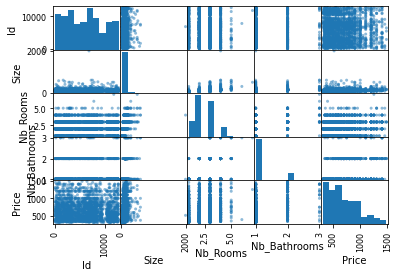

In [ ]:
pd.plotting.scatter_matrix(df_train)
plt.show()

In [ ]:
# In order to encode the categorical variables (by Label encoding), 
# we need to "get_dummies" from all the data. So we first concatenate them, and then get_dummies
# Make test indices start after the end of train indices
df_test.set_index(df_test.index+len(df_train),inplace=True)
df = df_train.append(df_test)
df = pd.get_dummies(df)
df

,Id,Size,Nb_Rooms,Nb_Bathrooms,Price,Type_Appartements,Type_Maisons et Villas,Governorate_Ariana,Governorate_Ben arous,Governorate_Bizerte,...,City_Soliman,City_Sousse,City_Sousse Jawhara,City_Sousse Médina,City_Sousse Riadh,City_Sousse Sidi Abdelhamid,City_Tozeur,City_Tunis,City_Zaouit-Ksibat Thrayett,City_Zarzouna
0,4779,110.0,3.0,1.0,580.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,7628,40.0,1.0,1.0,650.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10843,75.0,1.0,1.0,570.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9401,55.0,2.0,1.0,350.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10911,140.0,2.0,1.0,550.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,1586,130.0,4.0,1.0,NaN,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2670,3056,70.0,1.0,1.0,NaN,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2671,11645,200.0,4.0,3.0,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2672,6562,70.0,2.0,1.0,NaN,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# In order to encode the categorical variables (by one-hot encoding), 
# we need to "get_dummies" from all the data. So we first concatenate them, and then get_dummies
# Make test indices start after the end of train indices
df_test.set_index(df_test.index+len(df_train),inplace=True)
df = df_train.append(df_test)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Type']=le.fit_transform(df['Type'])
df['Governorate']=le.fit_transform(df['Governorate'])
df['City']=le.fit_transform(df['City'])

In [ ]:
# Get back to train and test data, after being encoded by "get_dummies"
df_train = df[:len(df_train)].copy()
df_test = df[len(df_train):len(df)].copy()
df_test.drop(columns=['Price'], inplace=True)
df_test.reset_index(drop=True, inplace=True)
display(df_train)
display(df_test)

,Id,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms,Price
0,4779,0,1,31,110.0,3.0,1.0,580.0
1,7628,0,18,51,40.0,1.0,1.0,650.0
2,10843,0,20,74,75.0,1.0,1.0,570.0
3,9401,0,13,4,55.0,2.0,1.0,350.0
4,10911,0,18,116,140.0,2.0,1.0,550.0
...,...,...,...,...,...,...,...,...
2134,11994,1,15,101,90.0,2.0,1.0,400.0
2135,11113,0,12,4,60.0,1.0,1.0,350.0
2136,7148,0,0,46,70.0,2.0,1.0,350.0
2137,12143,1,0,57,130.0,2.0,2.0,700.0


,Id,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms
0,10419,1,15,4,280.0,8.0,2.0
1,1118,0,0,72,150.0,3.0,1.0
2,2028,0,18,4,120.0,2.0,1.0
3,8331,0,18,104,160.0,3.0,2.0
4,5371,0,18,104,90.0,2.0,1.0
...,...,...,...,...,...,...,...
530,1586,0,1,12,130.0,4.0,1.0
531,3056,0,0,57,70.0,1.0,1.0
532,11645,1,20,89,200.0,4.0,3.0
533,6562,0,0,4,70.0,2.0,1.0


In [ ]:
# Prepare data for training and test
# replace "NaN" by median of column (but maybe it's not the best way to do...!)
df_train.interpolate(method ='linear', limit_direction ='backward', inplace=True)
df_test.interpolate(method ='linear', limit_direction ='backward', inplace=True)
display(df_train)
display(df_test)

,Id,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms,Price
0,4779,0,1,31,110.0,3.0,1.0,580.0
1,7628,0,18,51,40.0,1.0,1.0,650.0
2,10843,0,20,74,75.0,1.0,1.0,570.0
3,9401,0,13,4,55.0,2.0,1.0,350.0
4,10911,0,18,116,140.0,2.0,1.0,550.0
...,...,...,...,...,...,...,...,...
2134,11994,1,15,101,90.0,2.0,1.0,400.0
2135,11113,0,12,4,60.0,1.0,1.0,350.0
2136,7148,0,0,46,70.0,2.0,1.0,350.0
2137,12143,1,0,57,130.0,2.0,2.0,700.0


,Id,Type,Governorate,City,Size,Nb_Rooms,Nb_Bathrooms
0,10419,1,15,4,280.0,8.0,2.0
1,1118,0,0,72,150.0,3.0,1.0
2,2028,0,18,4,120.0,2.0,1.0
3,8331,0,18,104,160.0,3.0,2.0
4,5371,0,18,104,90.0,2.0,1.0
...,...,...,...,...,...,...,...
530,1586,0,1,12,130.0,4.0,1.0
531,3056,0,0,57,70.0,1.0,1.0
532,11645,1,20,89,200.0,4.0,3.0
533,6562,0,0,4,70.0,2.0,1.0


In [ ]:
df_train.isnull().sum()

Id              0
Type            0
Governorate     0
City            0
Size            0
Nb_Rooms        0
Nb_Bathrooms    0
Price           0
dtype: int64

In [ ]:
df_test.isnull().sum()

Id              0
Type            0
Governorate     0
City            0
Size            0
Nb_Rooms        0
Nb_Bathrooms    0
dtype: int64

In [ ]:
# Create input X and output y datasets for training and test
# Don't forget to drop 'Id' column (it is not a feature!)
X_train = np.array(df_train.drop(['Id','Price'],1))
y_train = np.array(df_train['Price'])
X_test = np.array(df_test.drop(['Id'],1))
print(X_train)
print(y_train)
print(X_test)

[[  0.   1.  31. 110.   3.   1.]
 [  0.  18.  51.  40.   1.   1.]
 [  0.  20.  74.  75.   1.   1.]
 ...
 [  0.   0.  46.  70.   2.   1.]
 [  1.   0.  57. 130.   2.   2.]
 [  1.  14.  54. 300.   4.   1.]]
[ 580.  650.  570. ...  350.  700. 1200.]
[[  1.  15.   4. 280.   8.   2.]
 [  0.   0.  72. 150.   3.   1.]
 [  0.  18.   4. 120.   2.   1.]
 ...
 [  1.  20.  89. 200.   4.   3.]
 [  0.   0.   4.  70.   2.   1.]
 [  0.  11.  77.  80.   1.   1.]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_train, y_train, test_size=0.3, random_state=101)

Before tuning hyperparameters

ARDRegression()
  Train R2 =  0.143
  Train RMSE =  2.530E+02
  Train MAPE =  0.335


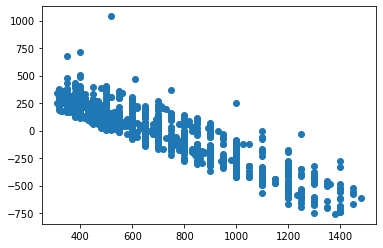

In [ ]:
# Model choice
model = ARDRegression()
# Model training
model.fit(X1_train, y1_train)
# Model predictions on the trained data
y_train_pred = model.predict(X1_train)
# Model evaluations on the training data
print(model)
print('  Train R2 = ', '%.3f' %r2_score(y1_train, y_train_pred))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y1_train,y_train_pred)))
print('  Train MAPE = ', '%.3f' %mean_absolute_percentage_error(y1_train,y_train_pred))
# Residuals plot
plt.scatter(y1_train, y_train_pred-y1_train)

In [ ]:
scores = cross_val_score(model, X1_train, y1_train, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [ 0.17508183  0.14983437  0.17335041  0.02969327  0.14517315  0.17750328
 -0.3790147   0.05358226  0.1843872   0.16912331]


Tuning hyperparameters function

In [ ]:
ARD = ARDRegression()

In [ ]:
n_iter = np.arange(1,501,100)
verbose = [True, False]
alpha_1 = (1e-9, 1.0, 'log-uniform')
alpha_2 = (1e-9, 1.0, 'log-uniform')
lambda_1 = (1e-9, 1000, 'log-uniform')
lambda_2 = (1e-9, 1000, 'log-uniform')

parameters = dict(n_iter = n_iter,
                 verbose = verbose,
                 alpha_1 = alpha_1,
                 alpha_2 = alpha_2,
                 lambda_1 = lambda_1,
                 lambda_2 = lambda_2)

grid = GridSearchCV(estimator = ARD, param_grid = parameters, scoring = 'r2', verbose = 1, n_jobs=-1, error_score='raise') #n_jobs use all proccessors
gridresult = grid.fit(X1_train, y1_train)

print('The best score was {:.5f} with parameters of {}'.format(gridresult.best_score_, gridresult.best_params_))

SyntaxError: ignored

After tuning hyperparameters


Converged after 4 iterations
ARDRegression(alpha_1=1, alpha_2=1e-09, lambda_2=1000, n_iter=101, verbose=True)
  Train R2 =  0.144
  Train RMSE =  2.529E+02
  Train MAPE =  0.335


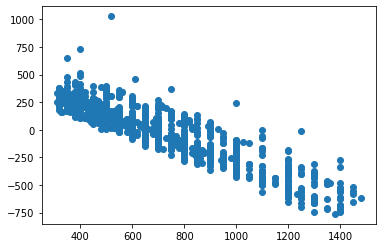

In [ ]:
# Model choice
model = ARDRegression(alpha_1=1, alpha_2 = 1e-09, lambda_1 = 1e-06, lambda_2 = 1000, n_iter = 101, verbose = True)
# Model training
model.fit(X1_train, y1_train)
# Model predictions on the trained data
y_train_pred = model.predict(X1_train)
# Model evaluations on the training data
print(model)
print('  Train R2 = ', '%.3f' %r2_score(y1_train, y_train_pred))
print('  Train RMSE = ', '%.3E' %np.sqrt(mean_squared_error(y1_train,y_train_pred)))
print('  Train MAPE = ', '%.3f' %mean_absolute_percentage_error(y1_train,y_train_pred))
# Residuals plot
plt.scatter(y1_train, y_train_pred-y1_train)

In [ ]:
scores = cross_val_score(model, X1_train, y1_train, cv=10)
print ("Cross-validated scores:", scores)

Converged after 5 iterations
Converged after 5 iterations
Converged after 5 iterations
Converged after 5 iterations
Converged after 5 iterations
Converged after 5 iterations
Converged after 4 iterations
Converged after 5 iterations
Converged after 5 iterations
Converged after 5 iterations
Cross-validated scores: [ 0.17716528  0.1550185   0.170627    0.03167673  0.14857997  0.17539949
 -0.39201485  0.05491351  0.18915241  0.1654887 ]


In [ ]:
y1_test_pred = model.predict(X1_test)

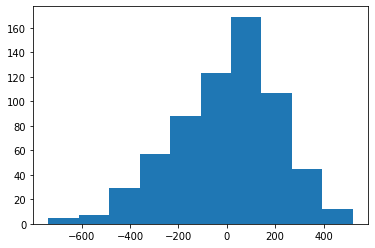


95.0 confidence interval -462.1415728002402 and 354.9400750503122


In [ ]:
plt.hist(y1_test_pred-y1_test)
plt.show()
 
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(y1_test_pred-y1_test, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(y1_test_pred-y1_test, p)
 
print(f"\n{alpha*100} confidence interval {lower} and {upper}")

In [ ]:
# Make predictions from the input test
y_test_pred = model.predict(X_test)
# Add the predictions to the test data
df_test['Price'] = y_test_pred
# Create the dataframe with only the Id and predictions columns (to be submitted)
df_subm = df_test[['Id','Price']].copy()
df_subm

,Id,Price
0,10419,875.080642
1,1118,954.158462
2,2028,652.992411
3,8331,928.339084
4,5371,716.203785
...,...,...
530,1586,693.412655
531,3056,698.621540
532,11645,1155.396777
533,6562,607.226576
